### This is the code kindly shared by J. Self, first author of the paper:
#### Self, J.; Bergstrom, H. K. Hypoeutectic Liquid-Solid Phase Diagrams for Ternary Lithium-Ion Battery Electrolytes. Journal of Physical Chemistry Letters 2024, 15 (2), 416-421, Article. DOI: 10.1021/acs.jpclett.3c03169.

In [20]:
# Simplified code for JPCL paper (draft) for Ruihe Li - JS 2024-02-13
import numpy as np, matplotlib.pyplot as plt, pandas as pd, scipy
from scipy import stats,integrate
# Where am I?
#!pwd
#!ls
#
plt.rc('font', size=12)
import pandas

In [21]:
###### 1) global variables ######
#################################
T0EC,T0EMC,R=273.15+38.05,273.15+-53.8,8.31
MolarMassSolvent1,MolarMassSolvent2=0.088,0.104
HfusEC,HfusEMC=13020,11240 # J/mol (ding) # J/mol (ding)
#### Fitted ####
C12global,C112global,C122global=[2.7936,-7.8747,1.7636] # model
######numerical variables####
nopoints=200000
###### functions #########
def diff_central(a, b):
    xdc0,xdc1,xdc2 = a[:-2],a[1:-1],a[2:]
    ydc0,ydc1,ydc2 = b[:-2],b[1:-1],b[2:]
    fdc = (xdc2 - xdc1)/(xdc2 - xdc0)
    return (1-fdc)*(ydc2 - ydc1)/(xdc2 - xdc1) + fdc*(ydc1 - ydc0)/(xdc1 - xdc0)
#############

In [22]:
######## 2) Activities of EC ##########################
######################## EC - LiPF6 ###########################
def a32(xx_exp,m2,C2=0,C22=  -0.2791617  ,C222= 0 ,C2222= -0.0191328):
    temp=(1-(2*m2)/(2*m2+1/MolarMassSolvent1))*xx_exp(C2*m2**1.5+C22*m2**2+C222*m2**2.5+C2222*m2**3)
    return(temp)
########################### EC - EMC ##########################
def a31(xx_exp,X1,C1,C11,C111,C1111): # EC EMC
    temp=(1-X1)*xx_exp(C1*X1**2+C11*X1**3+C111*X1**4)
    return(temp)
########### 3)  Fitting Activities of EMC ###################
####################### EMC - LiPF6 $########################
plt.figure(1),plt.figure(figsize=(4, 2)) 
def a12(xx_exp,m2,C2=0.8262921,C22= -1.79133566 ,C222= 1.70109032 ,C2222= -0.63441192):
    temp=(1-(2*m2)/(2*m2+1/MolarMassSolvent2))*xx_exp(C2*m2**1.5+C22*m2**2+C222*m2**2.5+C2222*m2**3)
    return(temp)
################################## parametrized ##################################
def a13(xx_exp,X1,C1,C11,C111,C1111): # EMC EC
    temp=(1-X1)*xx_exp(C1*X1**2+C11*X1**3+C111*X1**4) #three suffix Margules
    return(temp)

<Figure size 640x480 with 0 Axes>

<Figure size 400x200 with 0 Axes>

In [23]:
################################################################
########### 4) Establishing mixing rules #######################
################################################################
########### binary global parameters ###########################
C1ECEMC,C11ECEMC,C111ECEMC,C1111ECEMC=-0.66992,4.2840,-2.5671,0
C1EMCEC,C11EMCEC,C111EMCEC,C1111EMCEC=0.62190,2.5617,-2.5672,0
C2ECLiPF6global,C22ECLiPF6global,C222ECLiPF6global,C2222ECLiPF6global=0.042895,-0.38832,0.066300,-0.017292 # EC-LiPF6 #
C2EMCLiPF6global,C22EMCLiPF6global,C222EMCLiPF6global,C2222EMCLiPF6global=0.8262921,-1.79133566,1.70109032,-0.63441 #EMC-LiPF6#
#########################################################################################
def a3simplified(xx_exp,m2,X1,C12=C12global,C112=C112global,C122=C122global,X3=0,alpha=0): # aEC 
    X1solventratio=X1/(X1+X1*alpha)
    X3test=X1*alpha
    X2=1-X1-X3test
    aitern=X3test
    aitern*=a32(xx_exp,m2,C2=C2ECLiPF6global,C22=C22ECLiPF6global,C222=C222ECLiPF6global,C2222=C2222ECLiPF6global)/(1-(2*m2)/(2*m2+1/MolarMassSolvent1))
    aitern*=a31(xx_exp,X1solventratio,C1ECEMC,C11ECEMC,C111ECEMC,C1111ECEMC)/(1-X1solventratio)
    aitern*=xx_exp(C12*m2**1.5*X1solventratio**2+C112*m2**1.5*X1solventratio**3+C122*m2**2*X1solventratio**2)
    return(aitern)#
def a1simplified(xx_exp,m2,X3,alpha=0): # aEMC 
    X3solventratio=X3*alpha/(X3*alpha+X3)
    X1test=X3/(alpha+1E-16)
    X2=1-X3-X1test
    aitern=X1test
    aitern*=a12(xx_exp,m2,C2=C2EMCLiPF6global, C22=C22EMCLiPF6global, C222=C222EMCLiPF6global, C2222=C2222EMCLiPF6global)/(1-(2*m2)/(2*m2+1/MolarMassSolvent2))
    aitern*=a13(xx_exp,X3solventratio,C1EMCEC,C11EMCEC,C111EMCEC,C1111EMCEC)/(1-X3solventratio)
    return(aitern)

In [ ]:
####  TD Factor function (eq 10) ####
def calculatedTDfactor(x,alpha=1):
    nopoints=100000
    xLiTest=np.linspace(0,0.1,nopoints)
    mEC=1/(MolarMassSolvent1+MolarMassSolvent2/alpha)
    mEMC=mEC/alpha
    mLiTest=(mEC+mEMC)*xLiTest/(1-2*xLiTest) # mEC+mEMC
    xEMCtest=mEMC/(mEMC+mEC+2*mLiTest)
    xECtest=mEC/(mEC+mEMC+2*mLiTest)
    aEC=a3simplified(mLiTest,xEMCtest,alpha=alpha)
    aEMC=a1simplified(mLiTest,xECtest,alpha=alpha)
    mU,m1=mEMC,mEC
    tempGD=-mEMC*np.log(aEMC[:]/aEMC[0])-mEC*np.log(aEC[:]/(aEC[0]))
    calculatedTDfactorRETURN=diff_central(mLiTest[4:],tempGD[:-4]/2)
    return(mLiTest[2+4:],calculatedTDfactorRETURN)
x11,yTDF11=calculatedTDfactor(0,alpha=1.18)
x10,yTDF10=calculatedTDfactor(0,alpha=10000)
x01,yTDF01=calculatedTDfactor(0,alpha=0.00001)

In [ ]:
plt.plot(np.sqrt(x10),yTDF10,label="neat EC")
plt.plot(np.sqrt(x10),yTDF01,label="neat EMC")
plt.plot(np.sqrt(x11),yTDF11,'b',label="EC:EMC 6:5")
plt.xlabel("sqrt(molality)")
plt.ylabel("TDF")
plt.legend()

In [ ]:
### yoo #### From Jung 2023 paper - Need to verify expression is correct
def calculatedSolventTDfactor(x,alpha=1): 
    nopoints=100000
    xLiTest=np.linspace(0,0.1,nopoints)
    mEC=1/(MolarMassSolvent1+MolarMassSolvent2/alpha)
    mEMC=mEC/alpha
    mLiTest=(mEC+mEMC)*xLiTest/(1-2*xLiTest) # mEC+mEMC
    xEMCtest=mEMC/(mEMC+mEC+2*mLiTest)
    xECtest=mEC/(mEC+mEMC+2*mLiTest)    # Ruihe: y_EC
    aEC=a3simplified(mLiTest,xEMCtest,alpha=alpha)
    aEMC=a1simplified(mLiTest,xECtest,alpha=alpha)
    mU,m1=mEMC,mEC
    #
    gammaEC=a3simplified(mLiTest,xEMCtest,alpha=alpha)/xECtest
    yoo=xECtest[2:]*diff_central(xECtest[:],np.log(gammaEC[:]))
    #calculatedTDfactorRETURN=diff_central(mLiTest[4:],tempGD[:-4]/2)
    return(mLiTest[:],yoo)

In [73]:
### yoo #### From Jung 2023 paper - Need to verify expression is correct
def calculated_X_ij(nopoints,x,alpha=1): 
    # nopoints=100000
    xLiTest=np.linspace(0,0.15,nopoints)    # y_e
    mEC=1/(MolarMassSolvent1+MolarMassSolvent2/alpha)
    mEMC=mEC/alpha
    mLiTest=(mEC+mEMC)*xLiTest/(1-2*xLiTest) # mEC+mEMC
    xEMCtest=mEMC/(mEMC+mEC+2*mLiTest)
    xECtest=mEC/(mEC+mEMC+2*mLiTest)        # Ruihe: y_EC
    xLitest = mLiTest/(mEC+mEMC+2*mLiTest)  # Ruihe: y_e
    aEC=a3simplified(np.exp,mLiTest,xEMCtest,alpha=alpha)
    aEMC=a1simplified(np.exp,mLiTest,xECtest,alpha=alpha)
    mU,m1=mEMC,mEC
    #
    gammaEC=a3simplified(np.exp,mLiTest,xEMCtest,alpha=alpha)/xECtest
    X_oo=xECtest[2:]*diff_central(xECtest[:],np.log(gammaEC[:]))
    X_oe=xECtest[2:]*diff_central(xLitest[:],np.log(aEC[:]))
    X_eo=(
        - xECtest[2:] *diff_central(xECtest[:],np.log(aEC[:])) 
        - xEMCtest[2:]*diff_central(xECtest[:],np.log(aEMC[:])) 
    )
    X_ee = (
        - xECtest[2:] *diff_central(xLitest[:],np.log(aEC[:])) 
        - xEMCtest[2:]*diff_central(xLitest[:],np.log(aEMC[:])) 
        -2
    )
    #calculatedTDfactorRETURN=diff_central(mLiTest[4:],tempGD[:-4]/2)
    return(xECtest,mLiTest[:],X_oo,X_oe,X_eo,X_ee)
def calculated_X_ij_md1(x,alpha=1): 
    nopoints=100000
    y_e=np.linspace(0,0.1,nopoints)    # y_e
    mEC=1/(MolarMassSolvent1+MolarMassSolvent2/alpha)
    mEMC=mEC/alpha
    m_e=(mEC+mEMC)*y_e/(1-2*y_e) # mEC+mEMC
    y_EMC=mEMC/(mEMC+mEC+2*m_e)
    y_EC=mEC/(mEC+mEMC+2*m_e)        # Ruihe: y_EC

    aEC=a3simplified(np.exp,m_e,y_EMC,alpha=alpha)
    aEMC=a1simplified(np.exp,m_e,y_EC,alpha=alpha)
    gammaEC=a3simplified(np.exp,m_e,y_EMC,alpha=alpha)/y_EC
    X_oo=y_EC[2:]*diff_central(y_EC[:],np.log(gammaEC[:]))
    X_oe=y_EC[2:]*diff_central(y_e[:],np.log(aEC[:]))
    X_eo=(
        - y_EC[2:] *diff_central(y_EC[:],np.log(aEC[:])) 
        - y_EMC[2:]*diff_central(y_EC[:],np.log(aEMC[:])) 
    )
    X_ee = (
        - y_EC[2:] *diff_central(y_e[:],np.log(aEC[:])) 
        - y_EMC[2:]*diff_central(y_e[:],np.log(aEMC[:])) 
        -2
    )
    #calculatedTDfactorRETURN=diff_central(m_e[4:],tempGD[:-4]/2)
    return(y_EC,m_e[:],X_oo,X_oe,X_eo,X_ee)


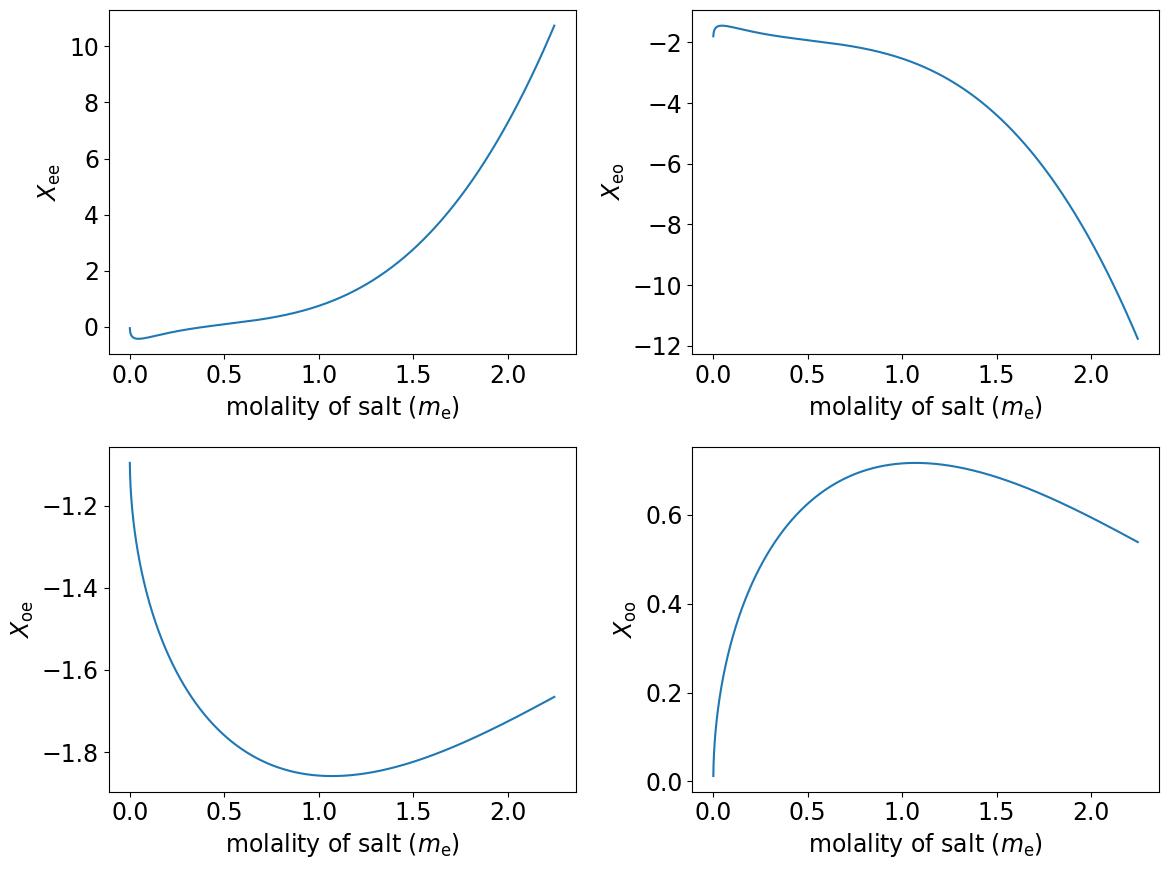

In [88]:
# plot version from Self
nopoints=10000
xECtest11,x11,X_oo11,X_oe11,X_eo11,X_ee11=calculated_X_ij(nopoints,0,alpha=1.18)
fig, Axs = plt.subplots(2,2, figsize=(12,9),tight_layout=True)
axs = Axs.flatten()
axs[0].plot(x11[2:], X_ee11,"-",)
axs[1].plot(x11[2:], X_eo11,"-",)
axs[2].plot(x11[2:], X_oe11,"-",)
axs[3].plot(x11[2:], X_oo11,"-",)

axs[0].set_ylabel("$X_\mathrm{ee}$")
axs[1].set_ylabel("$X_\mathrm{eo}$")
axs[2].set_ylabel("$X_\mathrm{oe}$")
axs[3].set_ylabel("$X_\mathrm{oo}$")
for i in range(4):
    axs[i].set_xlabel("molality of salt ($m_\mathrm{e}$)")

In [59]:
# Change to version of sy
import sympy as sy; from sympy import symbols
def calculated_X_ij_md2(y_e_subs,alpha_subs): 
    y_e,alpha=symbols("y_e alpha",real=True); 
    mEC=1/(MolarMassSolvent1+MolarMassSolvent2/alpha)
    mEMC=mEC/alpha
    m_e=(mEC+mEMC)*y_e/(1-2*y_e) # mEC+mEMC
    y_EC=mEC/(mEC+mEMC+2*m_e)
    y_EMC=mEMC/(mEMC+mEC+2*m_e)

    aEC=a3simplified(sy.exp,m_e,y_EMC,alpha=alpha)
    aEMC=a1simplified(sy.exp,m_e,y_EC,alpha=alpha)
    gammaEC=a3simplified(sy.exp,m_e,y_EMC,alpha=alpha)/y_EC
    X_oo=y_EC*  ( sy.diff(sy.log(gammaEC),y_e)* (1/ sy.diff(y_EC,y_e)) )
    
    X_oe=y_EC*sy.diff(sy.log(aEC),y_e)
    X_eo=(
        - y_EC *(sy.diff(sy.log(aEC),y_e) *  (1/ sy.diff(y_EC,y_e)) )
        - y_EMC* (sy.diff(sy.log(aEMC),y_e) *  (1/ sy.diff(y_EC,y_e)) )
    )
    X_ee = (
        - y_EC *sy.diff(sy.log(aEC),y_e) 
        - y_EMC*sy.diff(sy.log(aEMC),y_e) 
        -2
    )
    X_oo_subs = X_oo.subs({y_e:y_e_subs,alpha:alpha_subs})
    X_oe_subs = X_oe.subs({y_e:y_e_subs,alpha:alpha_subs})
    X_eo_subs = X_eo.subs({y_e:y_e_subs,alpha:alpha_subs})
    X_ee_subs = X_ee.subs({y_e:y_e_subs,alpha:alpha_subs})
    m_e_subs  = m_e.subs ({y_e:y_e_subs,alpha:alpha_subs})
    return(m_e_subs,X_oo_subs,X_oe_subs,X_eo_subs,X_ee_subs)

def calculated_X_ij_get_Expression(): 
    y_e,alpha=symbols("y_e alpha",real=True); 
    mEC=1/(MolarMassSolvent1+MolarMassSolvent2/alpha)
    mEMC=mEC/alpha
    m_e=(mEC+mEMC)*y_e/(1-2*y_e) # mEC+mEMC
    y_EC=mEC/(mEC+mEMC+2*m_e)
    y_EMC=mEMC/(mEMC+mEC+2*m_e)

    aEC=a3simplified(sy.exp,m_e,y_EMC,alpha=alpha)
    aEMC=a1simplified(sy.exp,m_e,y_EC,alpha=alpha)
    gammaEC=a3simplified(sy.exp,m_e,y_EMC,alpha=alpha)/y_EC
    X_oo=y_EC*  ( sy.diff(sy.log(gammaEC),y_e)* (1/ sy.diff(y_EC,y_e)) )
    
    X_oe=y_EC*sy.diff(sy.log(aEC),y_e)
    X_eo=(
        - y_EC *(sy.diff(sy.log(aEC),y_e) *  (1/ sy.diff(y_EC,y_e)) )
        - y_EMC* (sy.diff(sy.log(aEMC),y_e) *  (1/ sy.diff(y_EC,y_e)) )
    )
    X_ee = (
        - y_EC *sy.diff(sy.log(aEC),y_e) 
        - y_EMC*sy.diff(sy.log(aEMC),y_e) 
        -2
    )
    return(m_e,X_oo,X_oe,X_eo,X_ee)

In [67]:
m_e,X_oo,X_oe,X_eo,X_ee = calculated_X_ij_get_Expression()
print(X_eo)

-0.010816*(0.846153846153846 + 1/alpha)**2*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**2*((-4*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e)**2 - 2*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e))*exp(-61.9378698224852/(alpha**2*(0.846153846153846 + 1/alpha)**2*(1/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))) + 1/(alpha*(0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))))**2*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**2) + 3808.4604005462/(alpha**3*(0.846153846153846 + 1/alpha)**3*(1/((0.088 + 0.104/alpha)*(2*y_e*(1/(0

In [89]:
# Get np expression for X_ij (bug: take alpha as known, only do derivative to y_e)
def Fun_X_ij_np(y_e,alpha):
    X_ee = -((-4*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e)**2 - 2*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e))*np.exp(-61.9378698224852/(alpha**2*(0.846153846153846 + 1/alpha)**2*(1/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))) + 1/(alpha*(0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))))**2*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**2) + 3808.4604005462/(alpha**3*(0.846153846153846 + 1/alpha)**3*(1/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))) + 1/(alpha*(0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))))**3*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**3) - 21943.6783879241/(alpha**4*(0.846153846153846 + 1/alpha)**4*(1/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))) + 1/(alpha*(0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))))**4*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**4))*np.exp(163.054733727811*y_e**2*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**2/(alpha**2*(0.846153846153846 + 1/alpha)**2*(1 - 2*y_e)**2*(1/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))) + 1/(alpha*(0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))))**2*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**2) + 258.284023668639*(y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e))**1.5/(alpha**2*(0.846153846153846 + 1/alpha)**2*(1/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))) + 1/(alpha*(0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))))**2*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**2) - 7000.57962562585*(y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e))**1.5/(alpha**3*(0.846153846153846 + 1/alpha)**3*(1/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))) + 1/(alpha*(0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))))**3*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**3))*np.exp(-0.017292*y_e**3*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**3/(1 - 2*y_e)**3 - 0.38832*y_e**2*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**2/(1 - 2*y_e)**2 + 0.042895*(y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e))**1.5 + 0.0663*(y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e))**2.5)/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**2) + (-0.103752*y_e**3*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**3/(1 - 2*y_e)**4 - 0.051876*y_e**2*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**3/(1 - 2*y_e)**3 - 1.55328*y_e**2*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**2/(1 - 2*y_e)**3 - 0.77664*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**2/(1 - 2*y_e)**2 + 0.042895*(y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e))**1.5*(1 - 2*y_e)*(3.0*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e)**2 + 1.5*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e))/(y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))) + 0.0663*(y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e))**2.5*(1 - 2*y_e)*(5.0*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e)**2 + 2.5*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e))/(y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))))*np.exp(-61.9378698224852/(alpha**2*(0.846153846153846 + 1/alpha)**2*(1/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))) + 1/(alpha*(0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))))**2*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**2) + 3808.4604005462/(alpha**3*(0.846153846153846 + 1/alpha)**3*(1/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))) + 1/(alpha*(0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))))**3*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**3) - 21943.6783879241/(alpha**4*(0.846153846153846 + 1/alpha)**4*(1/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))) + 1/(alpha*(0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))))**4*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**4))*np.exp(163.054733727811*y_e**2*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**2/(alpha**2*(0.846153846153846 + 1/alpha)**2*(1 - 2*y_e)**2*(1/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))) + 1/(alpha*(0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))))**2*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**2) + 258.284023668639*(y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e))**1.5/(alpha**2*(0.846153846153846 + 1/alpha)**2*(1/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))) + 1/(alpha*(0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))))**2*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**2) - 7000.57962562585*(y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e))**1.5/(alpha**3*(0.846153846153846 + 1/alpha)**3*(1/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))) + 1/(alpha*(0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))))**3*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**3))*np.exp(-0.017292*y_e**3*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**3/(1 - 2*y_e)**3 - 0.38832*y_e**2*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**2/(1 - 2*y_e)**2 + 0.042895*(y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e))**1.5 + 0.0663*(y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e))**2.5)/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))) + (-61.9378698224852*(-8*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e)**2 - 4*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e))/(alpha**2*(0.846153846153846 + 1/alpha)**2*(1/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))) + 1/(alpha*(0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))))**2*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**3) - 61.9378698224852*(-2*(-4*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e)**2 - 2*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e))/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**2) - 2*(-4*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e)**2 - 2*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e))/(alpha*(0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**2))/(alpha**2*(0.846153846153846 + 1/alpha)**2*(1/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))) + 1/(alpha*(0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))))**3*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**2) + 3808.4604005462*(-12*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e)**2 - 6*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e))/(alpha**3*(0.846153846153846 + 1/alpha)**3*(1/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))) + 1/(alpha*(0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))))**3*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**4) + 3808.4604005462*(-3*(-4*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e)**2 - 2*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e))/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**2) - 3*(-4*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e)**2 - 2*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e))/(alpha*(0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**2))/(alpha**3*(0.846153846153846 + 1/alpha)**3*(1/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))) + 1/(alpha*(0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))))**4*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**3) - 21943.6783879241*(-16*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e)**2 - 8*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e))/(alpha**4*(0.846153846153846 + 1/alpha)**4*(1/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))) + 1/(alpha*(0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))))**4*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**5) - 21943.6783879241*(-4*(-4*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e)**2 - 2*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e))/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**2) - 4*(-4*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e)**2 - 2*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e))/(alpha*(0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**2))/(alpha**4*(0.846153846153846 + 1/alpha)**4*(1/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))) + 1/(alpha*(0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))))**5*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**4))*np.exp(-61.9378698224852/(alpha**2*(0.846153846153846 + 1/alpha)**2*(1/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))) + 1/(alpha*(0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))))**2*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**2) + 3808.4604005462/(alpha**3*(0.846153846153846 + 1/alpha)**3*(1/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))) + 1/(alpha*(0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))))**3*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**3) - 21943.6783879241/(alpha**4*(0.846153846153846 + 1/alpha)**4*(1/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))) + 1/(alpha*(0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))))**4*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**4))*np.exp(163.054733727811*y_e**2*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**2/(alpha**2*(0.846153846153846 + 1/alpha)**2*(1 - 2*y_e)**2*(1/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))) + 1/(alpha*(0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))))**2*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**2) + 258.284023668639*(y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e))**1.5/(alpha**2*(0.846153846153846 + 1/alpha)**2*(1/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))) + 1/(alpha*(0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))))**2*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**2) - 7000.57962562585*(y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e))**1.5/(alpha**3*(0.846153846153846 + 1/alpha)**3*(1/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))) + 1/(alpha*(0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))))**3*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**3))*np.exp(-0.017292*y_e**3*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**3/(1 - 2*y_e)**3 - 0.38832*y_e**2*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**2/(1 - 2*y_e)**2 + 0.042895*(y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e))**1.5 + 0.0663*(y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e))**2.5)/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))) + (163.054733727811*y_e**2*(-8*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e)**2 - 4*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e))*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**2/(alpha**2*(0.846153846153846 + 1/alpha)**2*(1 - 2*y_e)**2*(1/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))) + 1/(alpha*(0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))))**2*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**3) + 163.054733727811*y_e**2*(-2*(-4*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e)**2 - 2*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e))/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**2) - 2*(-4*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e)**2 - 2*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e))/(alpha*(0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**2))*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**2/(alpha**2*(0.846153846153846 + 1/alpha)**2*(1 - 2*y_e)**2*(1/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))) + 1/(alpha*(0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))))**3*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**2) + 652.218934911243*y_e**2*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**2/(alpha**2*(0.846153846153846 + 1/alpha)**2*(1 - 2*y_e)**3*(1/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))) + 1/(alpha*(0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))))**2*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**2) + 326.109467455621*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**2/(alpha**2*(0.846153846153846 + 1/alpha)**2*(1 - 2*y_e)**2*(1/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))) + 1/(alpha*(0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))))**2*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**2) + 258.284023668639*(y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e))**1.5*(-8*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e)**2 - 4*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e))/(alpha**2*(0.846153846153846 + 1/alpha)**2*(1/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))) + 1/(alpha*(0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))))**2*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**3) + 258.284023668639*(y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e))**1.5*(-2*(-4*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e)**2 - 2*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e))/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**2) - 2*(-4*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e)**2 - 2*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e))/(alpha*(0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**2))/(alpha**2*(0.846153846153846 + 1/alpha)**2*(1/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))) + 1/(alpha*(0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))))**3*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**2) + 258.284023668639*(y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e))**1.5*(1 - 2*y_e)*(3.0*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e)**2 + 1.5*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e))/(alpha**2*y_e*(0.846153846153846 + 1/alpha)**2*(1/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))) + 1/(alpha*(0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))))**2*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**2) - 7000.57962562585*(y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e))**1.5*(-12*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e)**2 - 6*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e))/(alpha**3*(0.846153846153846 + 1/alpha)**3*(1/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))) + 1/(alpha*(0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))))**3*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**4) - 7000.57962562585*(y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e))**1.5*(-3*(-4*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e)**2 - 2*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e))/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**2) - 3*(-4*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e)**2 - 2*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e))/(alpha*(0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**2))/(alpha**3*(0.846153846153846 + 1/alpha)**3*(1/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))) + 1/(alpha*(0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))))**4*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**3) - 7000.57962562585*(y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e))**1.5*(1 - 2*y_e)*(3.0*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e)**2 + 1.5*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e))/(alpha**3*y_e*(0.846153846153846 + 1/alpha)**3*(1/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))) + 1/(alpha*(0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))))**3*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**3))*np.exp(-61.9378698224852/(alpha**2*(0.846153846153846 + 1/alpha)**2*(1/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))) + 1/(alpha*(0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))))**2*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**2) + 3808.4604005462/(alpha**3*(0.846153846153846 + 1/alpha)**3*(1/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))) + 1/(alpha*(0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))))**3*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**3) - 21943.6783879241/(alpha**4*(0.846153846153846 + 1/alpha)**4*(1/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))) + 1/(alpha*(0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))))**4*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**4))*np.exp(163.054733727811*y_e**2*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**2/(alpha**2*(0.846153846153846 + 1/alpha)**2*(1 - 2*y_e)**2*(1/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))) + 1/(alpha*(0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))))**2*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**2) + 258.284023668639*(y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e))**1.5/(alpha**2*(0.846153846153846 + 1/alpha)**2*(1/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))) + 1/(alpha*(0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))))**2*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**2) - 7000.57962562585*(y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e))**1.5/(alpha**3*(0.846153846153846 + 1/alpha)**3*(1/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))) + 1/(alpha*(0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))))**3*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**3))*np.exp(-0.017292*y_e**3*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**3/(1 - 2*y_e)**3 - 0.38832*y_e**2*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**2/(1 - 2*y_e)**2 + 0.042895*(y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e))**1.5 + 0.0663*(y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e))**2.5)/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))))*np.exp(61.9378698224852/(alpha**2*(0.846153846153846 + 1/alpha)**2*(1/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))) + 1/(alpha*(0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))))**2*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**2) - 3808.4604005462/(alpha**3*(0.846153846153846 + 1/alpha)**3*(1/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))) + 1/(alpha*(0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))))**3*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**3) + 21943.6783879241/(alpha**4*(0.846153846153846 + 1/alpha)**4*(1/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))) + 1/(alpha*(0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))))**4*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**4))*np.exp(-163.054733727811*y_e**2*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**2/(alpha**2*(0.846153846153846 + 1/alpha)**2*(1 - 2*y_e)**2*(1/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))) + 1/(alpha*(0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))))**2*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**2) - 258.284023668639*(y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e))**1.5/(alpha**2*(0.846153846153846 + 1/alpha)**2*(1/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))) + 1/(alpha*(0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))))**2*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**2) + 7000.57962562585*(y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e))**1.5/(alpha**3*(0.846153846153846 + 1/alpha)**3*(1/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))) + 1/(alpha*(0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))))**3*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**3))*np.exp(0.017292*y_e**3*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**3/(1 - 2*y_e)**3 + 0.38832*y_e**2*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**2/(1 - 2*y_e)**2 - 0.042895*(y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e))**1.5 - 0.0663*(y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e))**2.5) - 2 - (alpha + 1.0e-16)*((-4*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e)**2 - 2*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e))*np.exp(-21944.5331921151*alpha**4/((0.846153846153846 + 1/alpha)**4*(alpha/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))) + 1/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))))**4*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**4) + 2277.34197200728*alpha**3/((0.846153846153846 + 1/alpha)**3*(alpha/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))) + 1/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))))**3*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**3) + 57.498150887574*alpha**2/((0.846153846153846 + 1/alpha)**2*(alpha/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))) + 1/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))))**2*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**2))*np.exp(-0.63441*y_e**3*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**3/(1 - 2*y_e)**3 - 1.79133566*y_e**2*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**2/(1 - 2*y_e)**2 + 0.8262921*(y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e))**1.5 + 1.70109032*(y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e))**2.5)/((0.088 + 0.104/alpha)*(alpha + 1.0e-16)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**2) + (-3.80646*y_e**3*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**3/(1 - 2*y_e)**4 - 1.90323*y_e**2*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**3/(1 - 2*y_e)**3 - 7.16534264*y_e**2*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**2/(1 - 2*y_e)**3 - 3.58267132*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**2/(1 - 2*y_e)**2 + 0.8262921*(y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e))**1.5*(1 - 2*y_e)*(3.0*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e)**2 + 1.5*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e))/(y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))) + 1.70109032*(y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e))**2.5*(1 - 2*y_e)*(5.0*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e)**2 + 2.5*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e))/(y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))))*np.exp(-21944.5331921151*alpha**4/((0.846153846153846 + 1/alpha)**4*(alpha/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))) + 1/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))))**4*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**4) + 2277.34197200728*alpha**3/((0.846153846153846 + 1/alpha)**3*(alpha/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))) + 1/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))))**3*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**3) + 57.498150887574*alpha**2/((0.846153846153846 + 1/alpha)**2*(alpha/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))) + 1/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))))**2*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**2))*np.exp(-0.63441*y_e**3*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**3/(1 - 2*y_e)**3 - 1.79133566*y_e**2*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**2/(1 - 2*y_e)**2 + 0.8262921*(y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e))**1.5 + 1.70109032*(y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e))**2.5)/((0.088 + 0.104/alpha)*(alpha + 1.0e-16)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))) + (-21944.5331921151*alpha**4*(-16*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e)**2 - 8*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e))/((0.846153846153846 + 1/alpha)**4*(alpha/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))) + 1/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))))**4*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**5) - 21944.5331921151*alpha**4*(-4*alpha*(-4*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e)**2 - 2*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e))/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**2) - 4*(-4*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e)**2 - 2*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e))/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**2))/((0.846153846153846 + 1/alpha)**4*(alpha/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))) + 1/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))))**5*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**4) + 2277.34197200728*alpha**3*(-12*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e)**2 - 6*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e))/((0.846153846153846 + 1/alpha)**3*(alpha/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))) + 1/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))))**3*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**4) + 2277.34197200728*alpha**3*(-3*alpha*(-4*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e)**2 - 2*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e))/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**2) - 3*(-4*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e)**2 - 2*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e))/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**2))/((0.846153846153846 + 1/alpha)**3*(alpha/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))) + 1/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))))**4*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**3) + 57.498150887574*alpha**2*(-8*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e)**2 - 4*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e))/((0.846153846153846 + 1/alpha)**2*(alpha/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))) + 1/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))))**2*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**3) + 57.498150887574*alpha**2*(-2*alpha*(-4*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e)**2 - 2*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e))/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**2) - 2*(-4*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e)**2 - 2*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e))/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**2))/((0.846153846153846 + 1/alpha)**2*(alpha/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))) + 1/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))))**3*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**2))*np.exp(-21944.5331921151*alpha**4/((0.846153846153846 + 1/alpha)**4*(alpha/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))) + 1/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))))**4*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**4) + 2277.34197200728*alpha**3/((0.846153846153846 + 1/alpha)**3*(alpha/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))) + 1/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))))**3*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**3) + 57.498150887574*alpha**2/((0.846153846153846 + 1/alpha)**2*(alpha/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))) + 1/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))))**2*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**2))*np.exp(-0.63441*y_e**3*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**3/(1 - 2*y_e)**3 - 1.79133566*y_e**2*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**2/(1 - 2*y_e)**2 + 0.8262921*(y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e))**1.5 + 1.70109032*(y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e))**2.5)/((0.088 + 0.104/alpha)*(alpha + 1.0e-16)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))))*np.exp(21944.5331921151*alpha**4/((0.846153846153846 + 1/alpha)**4*(alpha/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))) + 1/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))))**4*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**4) - 2277.34197200728*alpha**3/((0.846153846153846 + 1/alpha)**3*(alpha/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))) + 1/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))))**3*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**3) - 57.498150887574*alpha**2/((0.846153846153846 + 1/alpha)**2*(alpha/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))) + 1/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))))**2*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**2))*np.exp(0.63441*y_e**3*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**3/(1 - 2*y_e)**3 + 1.79133566*y_e**2*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**2/(1 - 2*y_e)**2 - 0.8262921*(y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e))**1.5 - 1.70109032*(y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e))**2.5)/alpha
    X_oe = ((-4*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e)**2 - 2*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e))*np.exp(-61.9378698224852/(alpha**2*(0.846153846153846 + 1/alpha)**2*(1/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))) + 1/(alpha*(0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))))**2*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**2) + 3808.4604005462/(alpha**3*(0.846153846153846 + 1/alpha)**3*(1/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))) + 1/(alpha*(0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))))**3*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**3) - 21943.6783879241/(alpha**4*(0.846153846153846 + 1/alpha)**4*(1/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))) + 1/(alpha*(0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))))**4*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**4))*np.exp(163.054733727811*y_e**2*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**2/(alpha**2*(0.846153846153846 + 1/alpha)**2*(1 - 2*y_e)**2*(1/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))) + 1/(alpha*(0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))))**2*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**2) + 258.284023668639*(y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e))**1.5/(alpha**2*(0.846153846153846 + 1/alpha)**2*(1/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))) + 1/(alpha*(0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))))**2*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**2) - 7000.57962562585*(y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e))**1.5/(alpha**3*(0.846153846153846 + 1/alpha)**3*(1/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))) + 1/(alpha*(0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))))**3*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**3))*np.exp(-0.017292*y_e**3*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**3/(1 - 2*y_e)**3 - 0.38832*y_e**2*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**2/(1 - 2*y_e)**2 + 0.042895*(y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e))**1.5 + 0.0663*(y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e))**2.5)/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**2) + (-0.103752*y_e**3*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**3/(1 - 2*y_e)**4 - 0.051876*y_e**2*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**3/(1 - 2*y_e)**3 - 1.55328*y_e**2*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**2/(1 - 2*y_e)**3 - 0.77664*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**2/(1 - 2*y_e)**2 + 0.042895*(y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e))**1.5*(1 - 2*y_e)*(3.0*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e)**2 + 1.5*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e))/(y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))) + 0.0663*(y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e))**2.5*(1 - 2*y_e)*(5.0*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e)**2 + 2.5*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e))/(y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))))*np.exp(-61.9378698224852/(alpha**2*(0.846153846153846 + 1/alpha)**2*(1/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))) + 1/(alpha*(0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))))**2*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**2) + 3808.4604005462/(alpha**3*(0.846153846153846 + 1/alpha)**3*(1/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))) + 1/(alpha*(0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))))**3*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**3) - 21943.6783879241/(alpha**4*(0.846153846153846 + 1/alpha)**4*(1/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))) + 1/(alpha*(0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))))**4*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**4))*np.exp(163.054733727811*y_e**2*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**2/(alpha**2*(0.846153846153846 + 1/alpha)**2*(1 - 2*y_e)**2*(1/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))) + 1/(alpha*(0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))))**2*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**2) + 258.284023668639*(y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e))**1.5/(alpha**2*(0.846153846153846 + 1/alpha)**2*(1/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))) + 1/(alpha*(0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))))**2*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**2) - 7000.57962562585*(y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e))**1.5/(alpha**3*(0.846153846153846 + 1/alpha)**3*(1/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))) + 1/(alpha*(0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))))**3*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**3))*np.exp(-0.017292*y_e**3*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**3/(1 - 2*y_e)**3 - 0.38832*y_e**2*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**2/(1 - 2*y_e)**2 + 0.042895*(y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e))**1.5 + 0.0663*(y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e))**2.5)/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))) + (-61.9378698224852*(-8*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e)**2 - 4*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e))/(alpha**2*(0.846153846153846 + 1/alpha)**2*(1/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))) + 1/(alpha*(0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))))**2*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**3) - 61.9378698224852*(-2*(-4*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e)**2 - 2*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e))/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**2) - 2*(-4*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e)**2 - 2*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e))/(alpha*(0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**2))/(alpha**2*(0.846153846153846 + 1/alpha)**2*(1/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))) + 1/(alpha*(0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))))**3*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**2) + 3808.4604005462*(-12*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e)**2 - 6*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e))/(alpha**3*(0.846153846153846 + 1/alpha)**3*(1/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))) + 1/(alpha*(0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))))**3*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**4) + 3808.4604005462*(-3*(-4*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e)**2 - 2*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e))/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**2) - 3*(-4*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e)**2 - 2*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e))/(alpha*(0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**2))/(alpha**3*(0.846153846153846 + 1/alpha)**3*(1/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))) + 1/(alpha*(0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))))**4*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**3) - 21943.6783879241*(-16*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e)**2 - 8*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e))/(alpha**4*(0.846153846153846 + 1/alpha)**4*(1/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))) + 1/(alpha*(0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))))**4*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**5) - 21943.6783879241*(-4*(-4*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e)**2 - 2*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e))/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**2) - 4*(-4*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e)**2 - 2*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e))/(alpha*(0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**2))/(alpha**4*(0.846153846153846 + 1/alpha)**4*(1/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))) + 1/(alpha*(0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))))**5*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**4))*np.exp(-61.9378698224852/(alpha**2*(0.846153846153846 + 1/alpha)**2*(1/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))) + 1/(alpha*(0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))))**2*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**2) + 3808.4604005462/(alpha**3*(0.846153846153846 + 1/alpha)**3*(1/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))) + 1/(alpha*(0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))))**3*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**3) - 21943.6783879241/(alpha**4*(0.846153846153846 + 1/alpha)**4*(1/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))) + 1/(alpha*(0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))))**4*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**4))*np.exp(163.054733727811*y_e**2*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**2/(alpha**2*(0.846153846153846 + 1/alpha)**2*(1 - 2*y_e)**2*(1/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))) + 1/(alpha*(0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))))**2*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**2) + 258.284023668639*(y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e))**1.5/(alpha**2*(0.846153846153846 + 1/alpha)**2*(1/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))) + 1/(alpha*(0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))))**2*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**2) - 7000.57962562585*(y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e))**1.5/(alpha**3*(0.846153846153846 + 1/alpha)**3*(1/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))) + 1/(alpha*(0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))))**3*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**3))*np.exp(-0.017292*y_e**3*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**3/(1 - 2*y_e)**3 - 0.38832*y_e**2*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**2/(1 - 2*y_e)**2 + 0.042895*(y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e))**1.5 + 0.0663*(y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e))**2.5)/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))) + (163.054733727811*y_e**2*(-8*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e)**2 - 4*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e))*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**2/(alpha**2*(0.846153846153846 + 1/alpha)**2*(1 - 2*y_e)**2*(1/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))) + 1/(alpha*(0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))))**2*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**3) + 163.054733727811*y_e**2*(-2*(-4*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e)**2 - 2*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e))/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**2) - 2*(-4*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e)**2 - 2*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e))/(alpha*(0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**2))*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**2/(alpha**2*(0.846153846153846 + 1/alpha)**2*(1 - 2*y_e)**2*(1/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))) + 1/(alpha*(0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))))**3*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**2) + 652.218934911243*y_e**2*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**2/(alpha**2*(0.846153846153846 + 1/alpha)**2*(1 - 2*y_e)**3*(1/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))) + 1/(alpha*(0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))))**2*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**2) + 326.109467455621*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**2/(alpha**2*(0.846153846153846 + 1/alpha)**2*(1 - 2*y_e)**2*(1/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))) + 1/(alpha*(0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))))**2*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**2) + 258.284023668639*(y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e))**1.5*(-8*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e)**2 - 4*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e))/(alpha**2*(0.846153846153846 + 1/alpha)**2*(1/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))) + 1/(alpha*(0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))))**2*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**3) + 258.284023668639*(y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e))**1.5*(-2*(-4*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e)**2 - 2*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e))/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**2) - 2*(-4*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e)**2 - 2*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e))/(alpha*(0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**2))/(alpha**2*(0.846153846153846 + 1/alpha)**2*(1/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))) + 1/(alpha*(0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))))**3*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**2) + 258.284023668639*(y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e))**1.5*(1 - 2*y_e)*(3.0*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e)**2 + 1.5*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e))/(alpha**2*y_e*(0.846153846153846 + 1/alpha)**2*(1/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))) + 1/(alpha*(0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))))**2*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**2) - 7000.57962562585*(y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e))**1.5*(-12*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e)**2 - 6*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e))/(alpha**3*(0.846153846153846 + 1/alpha)**3*(1/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))) + 1/(alpha*(0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))))**3*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**4) - 7000.57962562585*(y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e))**1.5*(-3*(-4*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e)**2 - 2*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e))/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**2) - 3*(-4*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e)**2 - 2*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e))/(alpha*(0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**2))/(alpha**3*(0.846153846153846 + 1/alpha)**3*(1/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))) + 1/(alpha*(0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))))**4*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**3) - 7000.57962562585*(y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e))**1.5*(1 - 2*y_e)*(3.0*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e)**2 + 1.5*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e))/(alpha**3*y_e*(0.846153846153846 + 1/alpha)**3*(1/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))) + 1/(alpha*(0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))))**3*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**3))*np.exp(-61.9378698224852/(alpha**2*(0.846153846153846 + 1/alpha)**2*(1/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))) + 1/(alpha*(0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))))**2*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**2) + 3808.4604005462/(alpha**3*(0.846153846153846 + 1/alpha)**3*(1/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))) + 1/(alpha*(0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))))**3*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**3) - 21943.6783879241/(alpha**4*(0.846153846153846 + 1/alpha)**4*(1/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))) + 1/(alpha*(0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))))**4*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**4))*np.exp(163.054733727811*y_e**2*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**2/(alpha**2*(0.846153846153846 + 1/alpha)**2*(1 - 2*y_e)**2*(1/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))) + 1/(alpha*(0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))))**2*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**2) + 258.284023668639*(y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e))**1.5/(alpha**2*(0.846153846153846 + 1/alpha)**2*(1/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))) + 1/(alpha*(0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))))**2*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**2) - 7000.57962562585*(y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e))**1.5/(alpha**3*(0.846153846153846 + 1/alpha)**3*(1/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))) + 1/(alpha*(0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))))**3*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**3))*np.exp(-0.017292*y_e**3*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**3/(1 - 2*y_e)**3 - 0.38832*y_e**2*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**2/(1 - 2*y_e)**2 + 0.042895*(y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e))**1.5 + 0.0663*(y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e))**2.5)/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))))*np.exp(61.9378698224852/(alpha**2*(0.846153846153846 + 1/alpha)**2*(1/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))) + 1/(alpha*(0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))))**2*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**2) - 3808.4604005462/(alpha**3*(0.846153846153846 + 1/alpha)**3*(1/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))) + 1/(alpha*(0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))))**3*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**3) + 21943.6783879241/(alpha**4*(0.846153846153846 + 1/alpha)**4*(1/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))) + 1/(alpha*(0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))))**4*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**4))*np.exp(-163.054733727811*y_e**2*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**2/(alpha**2*(0.846153846153846 + 1/alpha)**2*(1 - 2*y_e)**2*(1/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))) + 1/(alpha*(0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))))**2*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**2) - 258.284023668639*(y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e))**1.5/(alpha**2*(0.846153846153846 + 1/alpha)**2*(1/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))) + 1/(alpha*(0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))))**2*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**2) + 7000.57962562585*(y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e))**1.5/(alpha**3*(0.846153846153846 + 1/alpha)**3*(1/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))) + 1/(alpha*(0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))))**3*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**3))*np.exp(0.017292*y_e**3*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**3/(1 - 2*y_e)**3 + 0.38832*y_e**2*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**2/(1 - 2*y_e)**2 - 0.042895*(y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e))**1.5 - 0.0663*(y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e))**2.5)
    X_eo = -0.010816*(0.846153846153846 + 1/alpha)**2*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**2*((-4*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e)**2 - 2*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e))*np.exp(-61.9378698224852/(alpha**2*(0.846153846153846 + 1/alpha)**2*(1/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))) + 1/(alpha*(0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))))**2*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**2) + 3808.4604005462/(alpha**3*(0.846153846153846 + 1/alpha)**3*(1/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))) + 1/(alpha*(0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))))**3*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**3) - 21943.6783879241/(alpha**4*(0.846153846153846 + 1/alpha)**4*(1/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))) + 1/(alpha*(0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))))**4*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**4))*np.exp(163.054733727811*y_e**2*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**2/(alpha**2*(0.846153846153846 + 1/alpha)**2*(1 - 2*y_e)**2*(1/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))) + 1/(alpha*(0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))))**2*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**2) + 258.284023668639*(y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e))**1.5/(alpha**2*(0.846153846153846 + 1/alpha)**2*(1/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))) + 1/(alpha*(0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))))**2*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**2) - 7000.57962562585*(y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e))**1.5/(alpha**3*(0.846153846153846 + 1/alpha)**3*(1/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))) + 1/(alpha*(0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))))**3*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**3))*np.exp(-0.017292*y_e**3*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**3/(1 - 2*y_e)**3 - 0.38832*y_e**2*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**2/(1 - 2*y_e)**2 + 0.042895*(y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e))**1.5 + 0.0663*(y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e))**2.5)/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**2) + (-0.103752*y_e**3*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**3/(1 - 2*y_e)**4 - 0.051876*y_e**2*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**3/(1 - 2*y_e)**3 - 1.55328*y_e**2*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**2/(1 - 2*y_e)**3 - 0.77664*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**2/(1 - 2*y_e)**2 + 0.042895*(y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e))**1.5*(1 - 2*y_e)*(3.0*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e)**2 + 1.5*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e))/(y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))) + 0.0663*(y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e))**2.5*(1 - 2*y_e)*(5.0*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e)**2 + 2.5*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e))/(y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))))*np.exp(-61.9378698224852/(alpha**2*(0.846153846153846 + 1/alpha)**2*(1/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))) + 1/(alpha*(0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))))**2*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**2) + 3808.4604005462/(alpha**3*(0.846153846153846 + 1/alpha)**3*(1/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))) + 1/(alpha*(0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))))**3*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**3) - 21943.6783879241/(alpha**4*(0.846153846153846 + 1/alpha)**4*(1/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))) + 1/(alpha*(0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))))**4*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**4))*np.exp(163.054733727811*y_e**2*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**2/(alpha**2*(0.846153846153846 + 1/alpha)**2*(1 - 2*y_e)**2*(1/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))) + 1/(alpha*(0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))))**2*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**2) + 258.284023668639*(y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e))**1.5/(alpha**2*(0.846153846153846 + 1/alpha)**2*(1/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))) + 1/(alpha*(0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))))**2*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**2) - 7000.57962562585*(y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e))**1.5/(alpha**3*(0.846153846153846 + 1/alpha)**3*(1/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))) + 1/(alpha*(0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))))**3*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**3))*np.exp(-0.017292*y_e**3*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**3/(1 - 2*y_e)**3 - 0.38832*y_e**2*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**2/(1 - 2*y_e)**2 + 0.042895*(y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e))**1.5 + 0.0663*(y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e))**2.5)/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))) + (-61.9378698224852*(-8*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e)**2 - 4*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e))/(alpha**2*(0.846153846153846 + 1/alpha)**2*(1/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))) + 1/(alpha*(0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))))**2*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**3) - 61.9378698224852*(-2*(-4*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e)**2 - 2*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e))/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**2) - 2*(-4*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e)**2 - 2*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e))/(alpha*(0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**2))/(alpha**2*(0.846153846153846 + 1/alpha)**2*(1/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))) + 1/(alpha*(0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))))**3*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**2) + 3808.4604005462*(-12*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e)**2 - 6*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e))/(alpha**3*(0.846153846153846 + 1/alpha)**3*(1/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))) + 1/(alpha*(0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))))**3*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**4) + 3808.4604005462*(-3*(-4*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e)**2 - 2*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e))/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**2) - 3*(-4*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e)**2 - 2*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e))/(alpha*(0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**2))/(alpha**3*(0.846153846153846 + 1/alpha)**3*(1/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))) + 1/(alpha*(0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))))**4*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**3) - 21943.6783879241*(-16*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e)**2 - 8*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e))/(alpha**4*(0.846153846153846 + 1/alpha)**4*(1/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))) + 1/(alpha*(0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))))**4*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**5) - 21943.6783879241*(-4*(-4*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e)**2 - 2*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e))/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**2) - 4*(-4*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e)**2 - 2*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e))/(alpha*(0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**2))/(alpha**4*(0.846153846153846 + 1/alpha)**4*(1/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))) + 1/(alpha*(0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))))**5*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**4))*np.exp(-61.9378698224852/(alpha**2*(0.846153846153846 + 1/alpha)**2*(1/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))) + 1/(alpha*(0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))))**2*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**2) + 3808.4604005462/(alpha**3*(0.846153846153846 + 1/alpha)**3*(1/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))) + 1/(alpha*(0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))))**3*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**3) - 21943.6783879241/(alpha**4*(0.846153846153846 + 1/alpha)**4*(1/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))) + 1/(alpha*(0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))))**4*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**4))*np.exp(163.054733727811*y_e**2*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**2/(alpha**2*(0.846153846153846 + 1/alpha)**2*(1 - 2*y_e)**2*(1/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))) + 1/(alpha*(0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))))**2*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**2) + 258.284023668639*(y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e))**1.5/(alpha**2*(0.846153846153846 + 1/alpha)**2*(1/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))) + 1/(alpha*(0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))))**2*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**2) - 7000.57962562585*(y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e))**1.5/(alpha**3*(0.846153846153846 + 1/alpha)**3*(1/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))) + 1/(alpha*(0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))))**3*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**3))*np.exp(-0.017292*y_e**3*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**3/(1 - 2*y_e)**3 - 0.38832*y_e**2*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**2/(1 - 2*y_e)**2 + 0.042895*(y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e))**1.5 + 0.0663*(y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e))**2.5)/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))) + (163.054733727811*y_e**2*(-8*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e)**2 - 4*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e))*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**2/(alpha**2*(0.846153846153846 + 1/alpha)**2*(1 - 2*y_e)**2*(1/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))) + 1/(alpha*(0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))))**2*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**3) + 163.054733727811*y_e**2*(-2*(-4*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e)**2 - 2*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e))/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**2) - 2*(-4*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e)**2 - 2*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e))/(alpha*(0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**2))*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**2/(alpha**2*(0.846153846153846 + 1/alpha)**2*(1 - 2*y_e)**2*(1/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))) + 1/(alpha*(0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))))**3*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**2) + 652.218934911243*y_e**2*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**2/(alpha**2*(0.846153846153846 + 1/alpha)**2*(1 - 2*y_e)**3*(1/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))) + 1/(alpha*(0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))))**2*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**2) + 326.109467455621*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**2/(alpha**2*(0.846153846153846 + 1/alpha)**2*(1 - 2*y_e)**2*(1/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))) + 1/(alpha*(0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))))**2*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**2) + 258.284023668639*(y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e))**1.5*(-8*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e)**2 - 4*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e))/(alpha**2*(0.846153846153846 + 1/alpha)**2*(1/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))) + 1/(alpha*(0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))))**2*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**3) + 258.284023668639*(y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e))**1.5*(-2*(-4*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e)**2 - 2*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e))/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**2) - 2*(-4*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e)**2 - 2*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e))/(alpha*(0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**2))/(alpha**2*(0.846153846153846 + 1/alpha)**2*(1/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))) + 1/(alpha*(0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))))**3*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**2) + 258.284023668639*(y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e))**1.5*(1 - 2*y_e)*(3.0*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e)**2 + 1.5*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e))/(alpha**2*y_e*(0.846153846153846 + 1/alpha)**2*(1/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))) + 1/(alpha*(0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))))**2*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**2) - 7000.57962562585*(y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e))**1.5*(-12*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e)**2 - 6*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e))/(alpha**3*(0.846153846153846 + 1/alpha)**3*(1/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))) + 1/(alpha*(0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))))**3*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**4) - 7000.57962562585*(y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e))**1.5*(-3*(-4*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e)**2 - 2*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e))/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**2) - 3*(-4*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e)**2 - 2*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e))/(alpha*(0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**2))/(alpha**3*(0.846153846153846 + 1/alpha)**3*(1/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))) + 1/(alpha*(0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))))**4*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**3) - 7000.57962562585*(y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e))**1.5*(1 - 2*y_e)*(3.0*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e)**2 + 1.5*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e))/(alpha**3*y_e*(0.846153846153846 + 1/alpha)**3*(1/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))) + 1/(alpha*(0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))))**3*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**3))*np.exp(-61.9378698224852/(alpha**2*(0.846153846153846 + 1/alpha)**2*(1/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))) + 1/(alpha*(0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))))**2*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**2) + 3808.4604005462/(alpha**3*(0.846153846153846 + 1/alpha)**3*(1/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))) + 1/(alpha*(0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))))**3*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**3) - 21943.6783879241/(alpha**4*(0.846153846153846 + 1/alpha)**4*(1/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))) + 1/(alpha*(0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))))**4*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**4))*np.exp(163.054733727811*y_e**2*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**2/(alpha**2*(0.846153846153846 + 1/alpha)**2*(1 - 2*y_e)**2*(1/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))) + 1/(alpha*(0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))))**2*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**2) + 258.284023668639*(y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e))**1.5/(alpha**2*(0.846153846153846 + 1/alpha)**2*(1/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))) + 1/(alpha*(0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))))**2*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**2) - 7000.57962562585*(y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e))**1.5/(alpha**3*(0.846153846153846 + 1/alpha)**3*(1/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))) + 1/(alpha*(0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))))**3*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**3))*np.exp(-0.017292*y_e**3*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**3/(1 - 2*y_e)**3 - 0.38832*y_e**2*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**2/(1 - 2*y_e)**2 + 0.042895*(y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e))**1.5 + 0.0663*(y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e))**2.5)/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))))*np.exp(61.9378698224852/(alpha**2*(0.846153846153846 + 1/alpha)**2*(1/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))) + 1/(alpha*(0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))))**2*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**2) - 3808.4604005462/(alpha**3*(0.846153846153846 + 1/alpha)**3*(1/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))) + 1/(alpha*(0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))))**3*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**3) + 21943.6783879241/(alpha**4*(0.846153846153846 + 1/alpha)**4*(1/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))) + 1/(alpha*(0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))))**4*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**4))*np.exp(-163.054733727811*y_e**2*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**2/(alpha**2*(0.846153846153846 + 1/alpha)**2*(1 - 2*y_e)**2*(1/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))) + 1/(alpha*(0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))))**2*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**2) - 258.284023668639*(y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e))**1.5/(alpha**2*(0.846153846153846 + 1/alpha)**2*(1/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))) + 1/(alpha*(0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))))**2*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**2) + 7000.57962562585*(y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e))**1.5/(alpha**3*(0.846153846153846 + 1/alpha)**3*(1/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))) + 1/(alpha*(0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))))**3*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**3))*np.exp(0.017292*y_e**3*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**3/(1 - 2*y_e)**3 + 0.38832*y_e**2*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**2/(1 - 2*y_e)**2 - 0.042895*(y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e))**1.5 - 0.0663*(y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e))**2.5)/((0.088 + 0.104/alpha)*(-4*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e)**2 - 2*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e))) - 0.010816*(0.846153846153846 + 1/alpha)**2*(alpha + 1.0e-16)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**2*((-4*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e)**2 - 2*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e))*np.exp(-21944.5331921151*alpha**4/((0.846153846153846 + 1/alpha)**4*(alpha/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))) + 1/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))))**4*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**4) + 2277.34197200728*alpha**3/((0.846153846153846 + 1/alpha)**3*(alpha/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))) + 1/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))))**3*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**3) + 57.498150887574*alpha**2/((0.846153846153846 + 1/alpha)**2*(alpha/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))) + 1/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))))**2*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**2))*np.exp(-0.63441*y_e**3*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**3/(1 - 2*y_e)**3 - 1.79133566*y_e**2*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**2/(1 - 2*y_e)**2 + 0.8262921*(y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e))**1.5 + 1.70109032*(y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e))**2.5)/((0.088 + 0.104/alpha)*(alpha + 1.0e-16)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**2) + (-3.80646*y_e**3*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**3/(1 - 2*y_e)**4 - 1.90323*y_e**2*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**3/(1 - 2*y_e)**3 - 7.16534264*y_e**2*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**2/(1 - 2*y_e)**3 - 3.58267132*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**2/(1 - 2*y_e)**2 + 0.8262921*(y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e))**1.5*(1 - 2*y_e)*(3.0*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e)**2 + 1.5*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e))/(y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))) + 1.70109032*(y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e))**2.5*(1 - 2*y_e)*(5.0*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e)**2 + 2.5*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e))/(y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))))*np.exp(-21944.5331921151*alpha**4/((0.846153846153846 + 1/alpha)**4*(alpha/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))) + 1/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))))**4*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**4) + 2277.34197200728*alpha**3/((0.846153846153846 + 1/alpha)**3*(alpha/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))) + 1/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))))**3*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**3) + 57.498150887574*alpha**2/((0.846153846153846 + 1/alpha)**2*(alpha/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))) + 1/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))))**2*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**2))*np.exp(-0.63441*y_e**3*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**3/(1 - 2*y_e)**3 - 1.79133566*y_e**2*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**2/(1 - 2*y_e)**2 + 0.8262921*(y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e))**1.5 + 1.70109032*(y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e))**2.5)/((0.088 + 0.104/alpha)*(alpha + 1.0e-16)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))) + (-21944.5331921151*alpha**4*(-16*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e)**2 - 8*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e))/((0.846153846153846 + 1/alpha)**4*(alpha/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))) + 1/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))))**4*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**5) - 21944.5331921151*alpha**4*(-4*alpha*(-4*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e)**2 - 2*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e))/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**2) - 4*(-4*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e)**2 - 2*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e))/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**2))/((0.846153846153846 + 1/alpha)**4*(alpha/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))) + 1/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))))**5*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**4) + 2277.34197200728*alpha**3*(-12*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e)**2 - 6*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e))/((0.846153846153846 + 1/alpha)**3*(alpha/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))) + 1/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))))**3*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**4) + 2277.34197200728*alpha**3*(-3*alpha*(-4*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e)**2 - 2*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e))/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**2) - 3*(-4*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e)**2 - 2*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e))/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**2))/((0.846153846153846 + 1/alpha)**3*(alpha/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))) + 1/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))))**4*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**3) + 57.498150887574*alpha**2*(-8*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e)**2 - 4*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e))/((0.846153846153846 + 1/alpha)**2*(alpha/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))) + 1/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))))**2*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**3) + 57.498150887574*alpha**2*(-2*alpha*(-4*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e)**2 - 2*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e))/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**2) - 2*(-4*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e)**2 - 2*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e))/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**2))/((0.846153846153846 + 1/alpha)**2*(alpha/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))) + 1/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))))**3*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**2))*np.exp(-21944.5331921151*alpha**4/((0.846153846153846 + 1/alpha)**4*(alpha/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))) + 1/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))))**4*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**4) + 2277.34197200728*alpha**3/((0.846153846153846 + 1/alpha)**3*(alpha/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))) + 1/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))))**3*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**3) + 57.498150887574*alpha**2/((0.846153846153846 + 1/alpha)**2*(alpha/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))) + 1/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))))**2*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**2))*np.exp(-0.63441*y_e**3*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**3/(1 - 2*y_e)**3 - 1.79133566*y_e**2*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**2/(1 - 2*y_e)**2 + 0.8262921*(y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e))**1.5 + 1.70109032*(y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e))**2.5)/((0.088 + 0.104/alpha)*(alpha + 1.0e-16)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))))*np.exp(21944.5331921151*alpha**4/((0.846153846153846 + 1/alpha)**4*(alpha/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))) + 1/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))))**4*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**4) - 2277.34197200728*alpha**3/((0.846153846153846 + 1/alpha)**3*(alpha/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))) + 1/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))))**3*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**3) - 57.498150887574*alpha**2/((0.846153846153846 + 1/alpha)**2*(alpha/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))) + 1/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))))**2*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**2))*np.exp(0.63441*y_e**3*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**3/(1 - 2*y_e)**3 + 1.79133566*y_e**2*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**2/(1 - 2*y_e)**2 - 0.8262921*(y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e))**1.5 - 1.70109032*(y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e))**2.5)/(alpha*(0.088 + 0.104/alpha)*(-4*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e)**2 - 2*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e)))
    X_oo = (2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))*((-0.103752*y_e**3*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**3/(1 - 2*y_e)**4 - 0.051876*y_e**2*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**3/(1 - 2*y_e)**3 - 1.55328*y_e**2*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**2/(1 - 2*y_e)**3 - 0.77664*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**2/(1 - 2*y_e)**2 + 0.042895*(y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e))**1.5*(1 - 2*y_e)*(3.0*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e)**2 + 1.5*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e))/(y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))) + 0.0663*(y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e))**2.5*(1 - 2*y_e)*(5.0*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e)**2 + 2.5*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e))/(y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))))*np.exp(-61.9378698224852/(alpha**2*(0.846153846153846 + 1/alpha)**2*(1/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))) + 1/(alpha*(0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))))**2*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**2) + 3808.4604005462/(alpha**3*(0.846153846153846 + 1/alpha)**3*(1/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))) + 1/(alpha*(0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))))**3*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**3) - 21943.6783879241/(alpha**4*(0.846153846153846 + 1/alpha)**4*(1/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))) + 1/(alpha*(0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))))**4*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**4))*np.exp(163.054733727811*y_e**2*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**2/(alpha**2*(0.846153846153846 + 1/alpha)**2*(1 - 2*y_e)**2*(1/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))) + 1/(alpha*(0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))))**2*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**2) + 258.284023668639*(y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e))**1.5/(alpha**2*(0.846153846153846 + 1/alpha)**2*(1/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))) + 1/(alpha*(0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))))**2*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**2) - 7000.57962562585*(y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e))**1.5/(alpha**3*(0.846153846153846 + 1/alpha)**3*(1/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))) + 1/(alpha*(0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))))**3*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**3))*np.exp(-0.017292*y_e**3*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**3/(1 - 2*y_e)**3 - 0.38832*y_e**2*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**2/(1 - 2*y_e)**2 + 0.042895*(y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e))**1.5 + 0.0663*(y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e))**2.5) + (-61.9378698224852*(-8*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e)**2 - 4*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e))/(alpha**2*(0.846153846153846 + 1/alpha)**2*(1/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))) + 1/(alpha*(0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))))**2*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**3) - 61.9378698224852*(-2*(-4*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e)**2 - 2*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e))/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**2) - 2*(-4*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e)**2 - 2*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e))/(alpha*(0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**2))/(alpha**2*(0.846153846153846 + 1/alpha)**2*(1/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))) + 1/(alpha*(0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))))**3*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**2) + 3808.4604005462*(-12*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e)**2 - 6*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e))/(alpha**3*(0.846153846153846 + 1/alpha)**3*(1/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))) + 1/(alpha*(0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))))**3*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**4) + 3808.4604005462*(-3*(-4*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e)**2 - 2*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e))/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**2) - 3*(-4*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e)**2 - 2*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e))/(alpha*(0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**2))/(alpha**3*(0.846153846153846 + 1/alpha)**3*(1/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))) + 1/(alpha*(0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))))**4*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**3) - 21943.6783879241*(-16*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e)**2 - 8*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e))/(alpha**4*(0.846153846153846 + 1/alpha)**4*(1/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))) + 1/(alpha*(0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))))**4*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**5) - 21943.6783879241*(-4*(-4*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e)**2 - 2*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e))/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**2) - 4*(-4*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e)**2 - 2*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e))/(alpha*(0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**2))/(alpha**4*(0.846153846153846 + 1/alpha)**4*(1/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))) + 1/(alpha*(0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))))**5*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**4))*np.exp(-61.9378698224852/(alpha**2*(0.846153846153846 + 1/alpha)**2*(1/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))) + 1/(alpha*(0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))))**2*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**2) + 3808.4604005462/(alpha**3*(0.846153846153846 + 1/alpha)**3*(1/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))) + 1/(alpha*(0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))))**3*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**3) - 21943.6783879241/(alpha**4*(0.846153846153846 + 1/alpha)**4*(1/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))) + 1/(alpha*(0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))))**4*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**4))*np.exp(163.054733727811*y_e**2*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**2/(alpha**2*(0.846153846153846 + 1/alpha)**2*(1 - 2*y_e)**2*(1/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))) + 1/(alpha*(0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))))**2*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**2) + 258.284023668639*(y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e))**1.5/(alpha**2*(0.846153846153846 + 1/alpha)**2*(1/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))) + 1/(alpha*(0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))))**2*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**2) - 7000.57962562585*(y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e))**1.5/(alpha**3*(0.846153846153846 + 1/alpha)**3*(1/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))) + 1/(alpha*(0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))))**3*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**3))*np.exp(-0.017292*y_e**3*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**3/(1 - 2*y_e)**3 - 0.38832*y_e**2*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**2/(1 - 2*y_e)**2 + 0.042895*(y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e))**1.5 + 0.0663*(y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e))**2.5) + (163.054733727811*y_e**2*(-8*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e)**2 - 4*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e))*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**2/(alpha**2*(0.846153846153846 + 1/alpha)**2*(1 - 2*y_e)**2*(1/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))) + 1/(alpha*(0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))))**2*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**3) + 163.054733727811*y_e**2*(-2*(-4*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e)**2 - 2*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e))/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**2) - 2*(-4*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e)**2 - 2*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e))/(alpha*(0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**2))*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**2/(alpha**2*(0.846153846153846 + 1/alpha)**2*(1 - 2*y_e)**2*(1/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))) + 1/(alpha*(0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))))**3*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**2) + 652.218934911243*y_e**2*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**2/(alpha**2*(0.846153846153846 + 1/alpha)**2*(1 - 2*y_e)**3*(1/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))) + 1/(alpha*(0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))))**2*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**2) + 326.109467455621*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**2/(alpha**2*(0.846153846153846 + 1/alpha)**2*(1 - 2*y_e)**2*(1/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))) + 1/(alpha*(0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))))**2*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**2) + 258.284023668639*(y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e))**1.5*(-8*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e)**2 - 4*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e))/(alpha**2*(0.846153846153846 + 1/alpha)**2*(1/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))) + 1/(alpha*(0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))))**2*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**3) + 258.284023668639*(y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e))**1.5*(-2*(-4*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e)**2 - 2*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e))/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**2) - 2*(-4*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e)**2 - 2*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e))/(alpha*(0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**2))/(alpha**2*(0.846153846153846 + 1/alpha)**2*(1/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))) + 1/(alpha*(0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))))**3*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**2) + 258.284023668639*(y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e))**1.5*(1 - 2*y_e)*(3.0*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e)**2 + 1.5*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e))/(alpha**2*y_e*(0.846153846153846 + 1/alpha)**2*(1/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))) + 1/(alpha*(0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))))**2*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**2) - 7000.57962562585*(y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e))**1.5*(-12*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e)**2 - 6*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e))/(alpha**3*(0.846153846153846 + 1/alpha)**3*(1/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))) + 1/(alpha*(0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))))**3*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**4) - 7000.57962562585*(y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e))**1.5*(-3*(-4*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e)**2 - 2*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e))/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**2) - 3*(-4*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e)**2 - 2*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e))/(alpha*(0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**2))/(alpha**3*(0.846153846153846 + 1/alpha)**3*(1/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))) + 1/(alpha*(0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))))**4*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**3) - 7000.57962562585*(y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e))**1.5*(1 - 2*y_e)*(3.0*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e)**2 + 1.5*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e))/(alpha**3*y_e*(0.846153846153846 + 1/alpha)**3*(1/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))) + 1/(alpha*(0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))))**3*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**3))*np.exp(-61.9378698224852/(alpha**2*(0.846153846153846 + 1/alpha)**2*(1/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))) + 1/(alpha*(0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))))**2*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**2) + 3808.4604005462/(alpha**3*(0.846153846153846 + 1/alpha)**3*(1/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))) + 1/(alpha*(0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))))**3*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**3) - 21943.6783879241/(alpha**4*(0.846153846153846 + 1/alpha)**4*(1/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))) + 1/(alpha*(0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))))**4*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**4))*np.exp(163.054733727811*y_e**2*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**2/(alpha**2*(0.846153846153846 + 1/alpha)**2*(1 - 2*y_e)**2*(1/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))) + 1/(alpha*(0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))))**2*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**2) + 258.284023668639*(y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e))**1.5/(alpha**2*(0.846153846153846 + 1/alpha)**2*(1/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))) + 1/(alpha*(0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))))**2*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**2) - 7000.57962562585*(y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e))**1.5/(alpha**3*(0.846153846153846 + 1/alpha)**3*(1/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))) + 1/(alpha*(0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))))**3*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**3))*np.exp(-0.017292*y_e**3*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**3/(1 - 2*y_e)**3 - 0.38832*y_e**2*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**2/(1 - 2*y_e)**2 + 0.042895*(y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e))**1.5 + 0.0663*(y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e))**2.5))*np.exp(61.9378698224852/(alpha**2*(0.846153846153846 + 1/alpha)**2*(1/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))) + 1/(alpha*(0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))))**2*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**2) - 3808.4604005462/(alpha**3*(0.846153846153846 + 1/alpha)**3*(1/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))) + 1/(alpha*(0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))))**3*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**3) + 21943.6783879241/(alpha**4*(0.846153846153846 + 1/alpha)**4*(1/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))) + 1/(alpha*(0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))))**4*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**4))*np.exp(-163.054733727811*y_e**2*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**2/(alpha**2*(0.846153846153846 + 1/alpha)**2*(1 - 2*y_e)**2*(1/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))) + 1/(alpha*(0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))))**2*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**2) - 258.284023668639*(y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e))**1.5/(alpha**2*(0.846153846153846 + 1/alpha)**2*(1/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))) + 1/(alpha*(0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))))**2*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**2) + 7000.57962562585*(y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e))**1.5/(alpha**3*(0.846153846153846 + 1/alpha)**3*(1/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))) + 1/(alpha*(0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))))**3*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**3))*np.exp(0.017292*y_e**3*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**3/(1 - 2*y_e)**3 + 0.38832*y_e**2*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**2/(1 - 2*y_e)**2 - 0.042895*(y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e))**1.5 - 0.0663*(y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e))**2.5)/(-4*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e)**2 - 2*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e))
    return X_oo,X_oe,X_eo,X_ee
# end function
def calculated_X_ij_md3(y_e,alpha): 
    mEC=1/(MolarMassSolvent1+MolarMassSolvent2/alpha)
    mEMC=mEC/alpha
    m_e=(mEC+mEMC)*y_e/(1-2*y_e) # mEC+mEMC
    X_oo_i,X_oe_i,X_eo_i,X_ee_i= Fun_X_ij_np(y_e,alpha)
    return m_e,X_oo_i,X_oe_i,X_eo_i,X_ee_i
    

In [90]:
m_e_List=[];X_oo_List=[];X_oe_List=[];X_eo_List=[];X_ee_List=[]
y_e_array = np.linspace(0.000,0.15,10000); 
for y_e_i in y_e_array:
    m_e_i,X_oo_i,X_oe_i,X_eo_i,X_ee_i= calculated_X_ij_md3(y_e_i,1.18)
    m_e_List.append(m_e_i); X_oo_List.append(X_oo_i);
    X_oe_List.append(X_oe_i);X_eo_List.append(X_eo_i);
    X_ee_List.append(X_ee_i)


/tmp/ipykernel_24453/2448569698.py:3: RuntimeWarning: invalid value encountered in scalar divide
  X_ee = -((-4*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e)**2 - 2*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e))*np.exp(-61.9378698224852/(alpha**2*(0.846153846153846 + 1/alpha)**2*(1/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))) + 1/(alpha*(0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))))**2*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))**2) + 3808.4604005462/(alpha**3*(0.846153846153846 + 1/alpha)**3*(1/((0.088 + 0.104/alpha)*(2*y_e*(1/(0.088 + 0.104/alpha) + 1/(alpha*(0.088 + 0.104/alpha)))/(1 - 2*y_e) + 1/(0.08

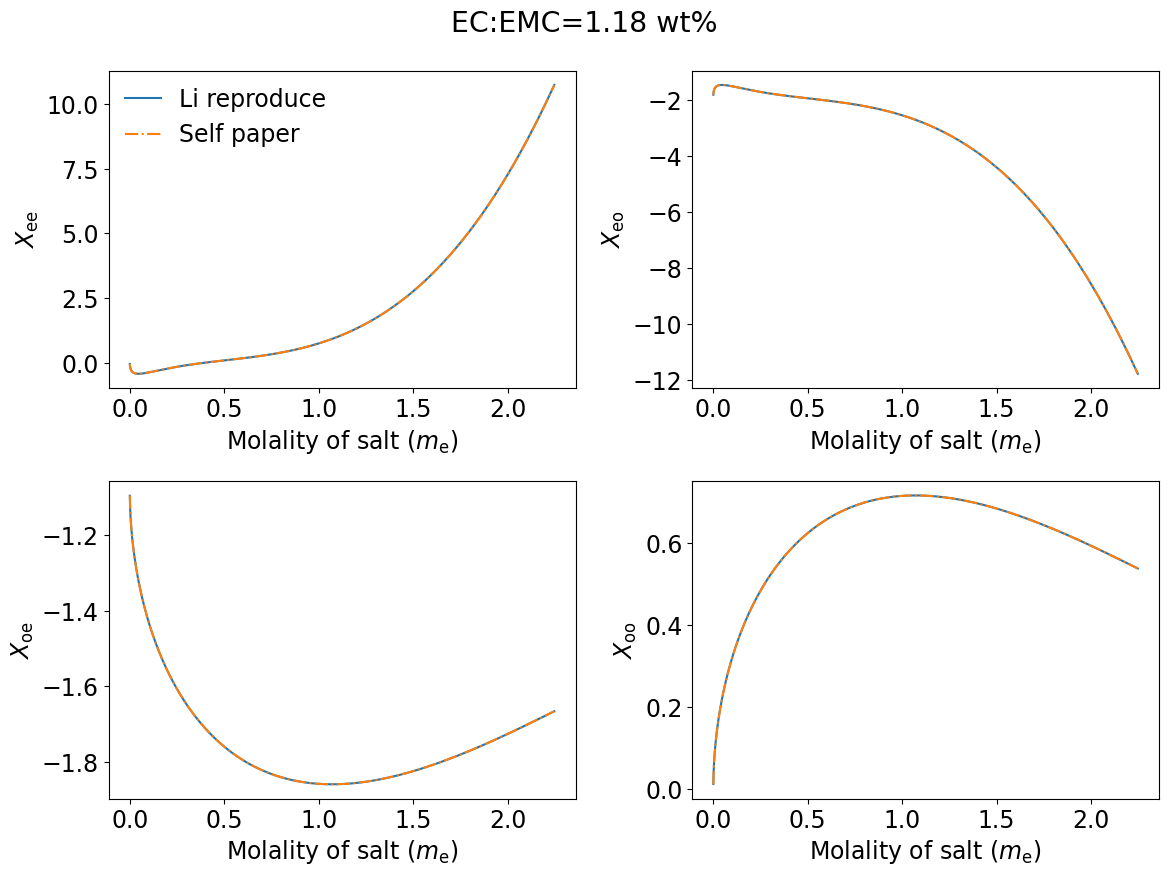

In [92]:
# compare:
import matplotlib as mpl; fs=17
font = {'family' : 'DejaVu Sans','size'   : fs}
mpl.rc('font', **font)
fig, Axs = plt.subplots(2,2, figsize=(12,9),tight_layout=True)
axs = Axs.flatten()
axs[0].plot(m_e_List, X_ee_List,"-",label="Li reproduce")
axs[1].plot(m_e_List, X_eo_List,"-",)
axs[2].plot(m_e_List, X_oe_List,"-",)
axs[3].plot(m_e_List, X_oo_List,"-",)
axs[0].plot(x11[2:], X_ee11,"-.",label="Self paper")
axs[1].plot(x11[2:], X_eo11,"-.",)
axs[2].plot(x11[2:], X_oe11,"-.",)
axs[3].plot(x11[2:], X_oo11,"-.",)

axs[0].set_ylabel("$X_\mathrm{ee}$")
axs[1].set_ylabel("$X_\mathrm{eo}$")
axs[2].set_ylabel("$X_\mathrm{oe}$")
axs[3].set_ylabel("$X_\mathrm{oo}$")
fig.suptitle("EC:EMC=1.18 wt%")
axs[0].legend(prop={'family':'DejaVu Sans','size':fs},
    frameon=False,markerscale=1,borderpad=0.2,
    handlelength=1.5,columnspacing=1)
for i in range(4):
    axs[i].set_xlabel("Molality of salt ($m_\mathrm{e}$)")

### Remaining task: 
#### (1) compare X_ee with Andrew; 
#### (2) chcekc whether it satisfy Maxwell constrain; 
#### (3) identify t_0+ and Xi_tilde based on them

In [ ]:
# compare with Andrew:
def X_ee_Andrew_yBase(y_e,y_EC): # from ACS Energy paper, only for EC-free
    x_ee = 2*(-18.38*y_e**0.5+155.3*y_e-450.6*y_e**1.5+1506*y_e**2.5)
    return x_ee

m_e_List=[];X_oo_List=[];X_oe_List=[];X_eo_List=[];X_ee_List=[]
y_e_array = np.linspace(0.002,0.15,10000); 
for y_e_i in y_e_array:
    X_oo_i,X_oe_i,X_eo_i,X_ee_i= Fun_X_ij_np(y_e_i,1e-5)
    m_e_List.append(m_e_i); X_oo_List.append(X_oo_i);
    X_oe_List.append(X_oe_i);X_eo_List.append(X_eo_i);
    X_ee_List.append(X_ee_i)
    
# y_e_array = np.linspace(1e-10,0.15,1000)
y_plot_ee = []
for y_e_i in y_e_array:
    y_o_i = (1-2*y_e_i) * 1/2 # fix y_o as it doesn't matter
    X_ee_sol = X_ee_Andrew_yBase(y_e_i,y_o_i)
    y_plot_ee.append( X_ee_sol  ) 

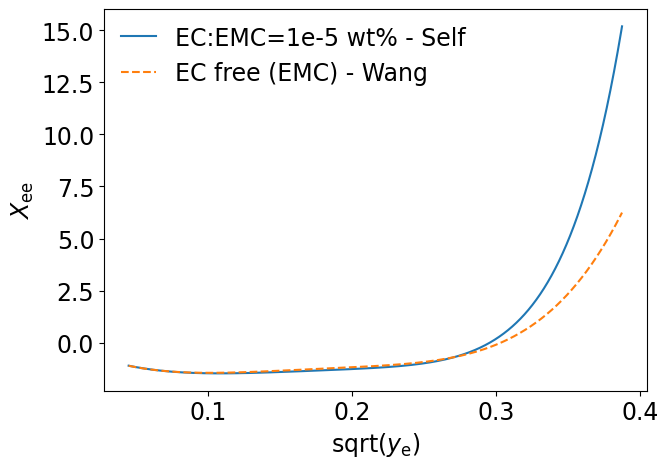

In [95]:
# plot
fig, ax = plt.subplots( figsize=(7,5),tight_layout=True)
ax.plot(np.sqrt(y_e_array), X_ee_List,"-",label="EC:EMC=1e-5 wt% - Self")
ax.plot(np.sqrt(y_e_array), y_plot_ee,"--",label="EC free (EMC) - Wang")
ax.set_ylabel("$X_\mathrm{ee}$")
ax.set_xlabel("sqrt($y_\mathrm{e}$)")
ax.legend(prop={'family':'DejaVu Sans','size':fs},
    frameon=False,markerscale=1,borderpad=0.2,
    handlelength=1.5,columnspacing=1)

In [97]:
# check Maxwell:
def Fun_check_Maxwell_Residual(y_e,alpha):
    mEC=1/(MolarMassSolvent1+MolarMassSolvent2/alpha)
    mEMC=mEC/alpha
    m_e=(mEC+mEMC)*y_e/(1-2*y_e) # mEC+mEMC
    y_o=mEC/(mEC+mEMC+2*m_e)
    X_oo_i,X_oe_i,X_eo_i,X_ee_i= Fun_X_ij_np(y_e,alpha)
    Left_1 = y_o*(1-y_o)*X_eo_i
    Left_2 = y_e *(1-2*y_e)*X_oe_i
    Left = Left_1 - Left_2
    Right = y_e*y_o*(X_ee_i-2*X_oo_i)
    Maxwell_residual = Left - Right
    # check also Determinant:
    Determinant = (1+X_oo_i)*(2+X_ee_i) - X_oe_i*X_eo_i
    return Left , Right,Maxwell_residual,Determinant

Left_List=[]; Right_List=[];Maxwell_residual_List=[];Determinant_List=[]
y_e_array = np.linspace(0.002,0.15,1000);  alpha = 1e-5
for y_e_i in y_e_array:
    Left , Right,Maxwell_residual,Determinant= Fun_check_Maxwell_Residual(y_e_i,alpha)
    Left_List.append(Left); Right_List.append(Right);
    Maxwell_residual_List.append(Maxwell_residual);Determinant_List.append(Determinant);


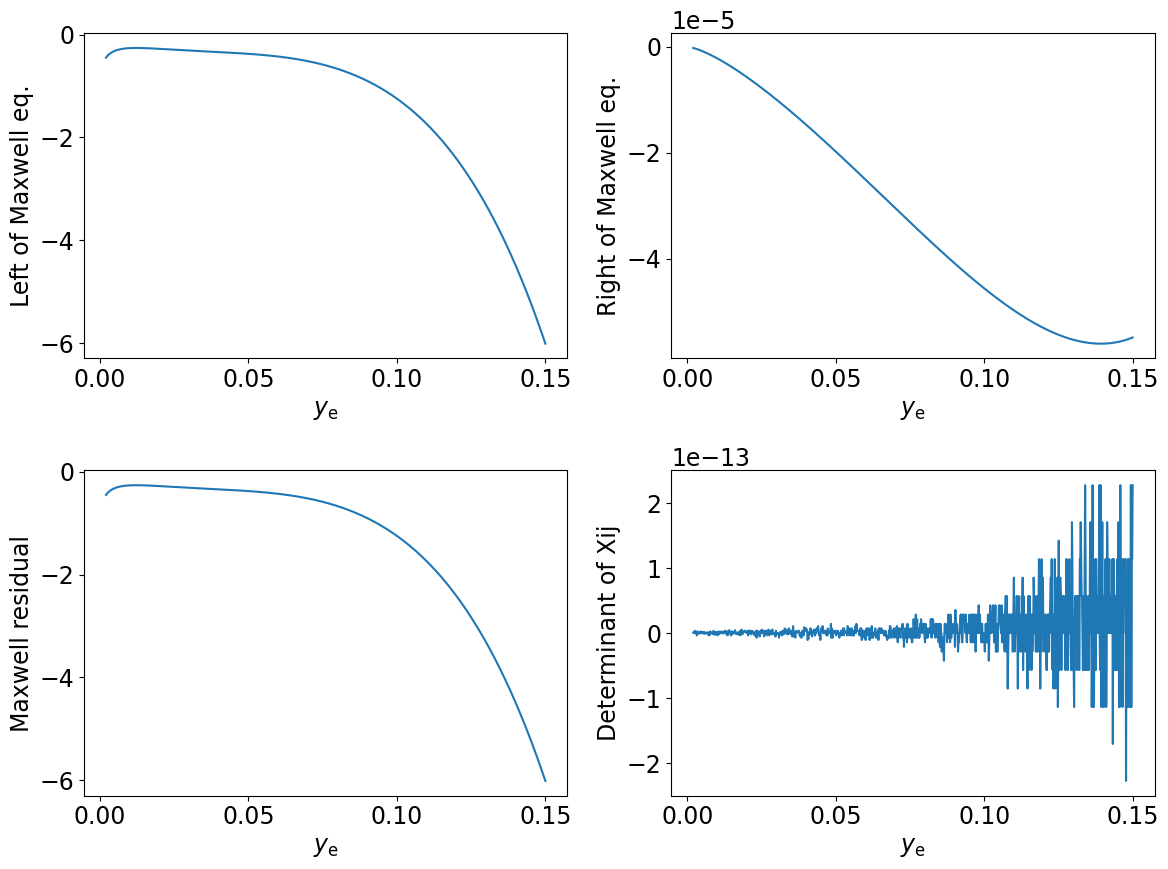

In [98]:

fig, Axs = plt.subplots(2,2, figsize=(12,9),tight_layout=True)
axs = Axs.flatten()
axs[0].plot(y_e_array, Left_List,"-",)
axs[1].plot(y_e_array, Right_List,"-",)
axs[2].plot(y_e_array, Maxwell_residual_List,"-",)
axs[3].plot(y_e_array, Determinant_List,"-",)

axs[0].set_ylabel("Left of Maxwell eq.")
axs[1].set_ylabel("Right of Maxwell eq.")
axs[2].set_ylabel("Maxwell residual")
axs[3].set_ylabel("Determinant of Xij")
for i in range(4):
    axs[i].set_xlabel("$y_\mathrm{e}$") 

In [ ]:
x11,yooTDF11=calculatedSolventTDfactor(0,alpha=1.18)
x10,yooTDF10=calculatedSolventTDfactor(0,alpha=10000)
x01,yooTDF01=calculatedSolventTDfactor(0,alpha=0.00001)
#
plt.plot(x10[2:],yooTDF10,label="neat EC")
plt.plot(x10[2:],yooTDF01,label="neat EMC")
plt.plot(x11[2:],yooTDF11,'b',label="EC:EMC 6:5")
plt.xlabel("molality of salt")
plt.ylabel("TDF of solvent (need to verify)")
plt.legend()
plt.ylim([0,3])

In [ ]:
# zoom in
plt.plot(x10[2:],yooTDF10,label="neat EC")
plt.plot(x10[2:],yooTDF01,label="neat EMC")
plt.plot(x11[2:],yooTDF11,'b',label="EC:EMC 6:5")
plt.xlabel("molality of salt")
plt.ylabel("TDF of solvent (need to verify)")
plt.legend()
plt.ylim([-0.01,0.2])
plt.xlim([-0.005,0.02])